<a href="https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/wip%20nbs/04_urls_cars_stanford_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 17.1MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 194kB 32.5MB/s 
     |████████████████████████████████| 1.2MB 51.7MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 12.8MB 240kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

# Standford Car Dataset (using URLs.CARS)

Learn something about this dataset:
- fastai external dataset [documentation](https://docs.fast.ai/data.external.html)
- standford dataset [home page](https://ai.stanford.edu/~jkrause/cars/car_dataset.html)

Key points:
- 16,185 images of 196 classes of cars.
- data split into 8,144 training images and 8,041 testing images, each class has been split roughly in a 50-50 split. 
- Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe.
- Metadata including class labels for training images and bounding boxes for all images, in file `cars_annos.mat`


In [3]:
path = untar_data(URLs.CARS)
Path.BASE_PATH = path

In [4]:
path.ls()

(#3) [Path('cars_test'),Path('cars_train'),Path('cars_annos.mat')]

Two folders and one file:
- folder `car_train`
- folder `cars_test`
- file `cars_annos.mat`

In [5]:
(path / 'cars_train').ls().sorted()

(#8144) [Path('cars_train/00001.jpg'),Path('cars_train/00002.jpg'),Path('cars_train/00003.jpg'),Path('cars_train/00004.jpg'),Path('cars_train/00005.jpg'),Path('cars_train/00006.jpg'),Path('cars_train/00007.jpg'),Path('cars_train/00008.jpg'),Path('cars_train/00009.jpg'),Path('cars_train/00010.jpg')...]

In [6]:
(path / 'cars_test').ls().sorted()

(#8041) [Path('cars_test/00001.jpg'),Path('cars_test/00002.jpg'),Path('cars_test/00003.jpg'),Path('cars_test/00004.jpg'),Path('cars_test/00005.jpg'),Path('cars_test/00006.jpg'),Path('cars_test/00007.jpg'),Path('cars_test/00008.jpg'),Path('cars_test/00009.jpg'),Path('cars_test/00010.jpg')...]

## Get metadata for dataset from file `cars_annos.mat`

In [7]:
anns = path / 'cars_annos.mat'
anns.is_file()

True

Google search on `.mat` files show that this is a `MATLAB` format. Can load and convert it with python (see [stackoverflow page](https://stackoverflow.com/questions/874461/read-mat-files-in-python))

In [8]:
import scipy.io
mat = scipy.io.loadmat(anns)
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'annotations', 'class_names'])

Let's review what these are:

In [9]:
for key, value in mat.items():
    print(key)
    display(value)

__header__


b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Feb 28 19:34:55 2015'

__version__


'1.0'

__globals__


[]

annotations


array([[(array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        (array(['car_ims/000002.jpg'], dtype='<U18'), array([[48]], dtype=uint8), array([[24]], dtype=uint8), array([[441]], dtype=uint16), array([[202]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        (array(['car_ims/000003.jpg'], dtype='<U18'), array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[277]], dtype=uint16), array([[180]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        ...,
        (array(['car_ims/016183.jpg'], dtype='<U18'), array([[25]], dtype=uint8), array([[32]], dtype=uint8), array([[587]], dtype=uint16), array([[359]], dtype=uint16), array([[196]], dtype=uint8), array([[1]], dtype=uint8)),
        (array(['car_ims/016184.jpg'], dtype='<U18'), array([[56]], dtype=uint8), array([

class_names


array([[array(['AM General Hummer SUV 2000'], dtype='<U26'), array(['Acura RL Sedan 2012'], dtype='<U19'), array(['Acura TL Sedan 2012'], dtype='<U19'),
        array(['Acura TL Type-S 2008'], dtype='<U20'), array(['Acura TSX Sedan 2012'], dtype='<U20'), array(['Acura Integra Type R 2001'], dtype='<U25'),
        array(['Acura ZDX Hatchback 2012'], dtype='<U24'), array(['Aston Martin V8 Vantage Convertible 2012'], dtype='<U40'), array(['Aston Martin V8 Vantage Coupe 2012'], dtype='<U34'),
        array(['Aston Martin Virage Convertible 2012'], dtype='<U36'), array(['Aston Martin Virage Coupe 2012'], dtype='<U30'), array(['Audi RS 4 Convertible 2008'], dtype='<U26'),
        array(['Audi A5 Coupe 2012'], dtype='<U18'), array(['Audi TTS Coupe 2012'], dtype='<U19'), array(['Audi R8 Coupe 2012'], dtype='<U18'), array(['Audi V8 Sedan 1994'], dtype='<U18'),
        array(['Audi 100 Sedan 1994'], dtype='<U19'), array(['Audi 100 Wagon 1994'], dtype='<U19'), array(['Audi TT Hatchback 2011'], dt

Two keys seem of interest: `annotations` and `class_names`

### `class_names`

In [10]:
c = mat['class_names']
c.shape

(1, 196)

In [11]:
c[0,0:3]

array([array(['AM General Hummer SUV 2000'], dtype='<U26'), array(['Acura RL Sedan 2012'], dtype='<U19'), array(['Acura TL Sedan 2012'], dtype='<U19')], dtype=object)

Let's make a clean list of classes by using a list comprehension on the np array, and extracting the strings with `.item()`

In [12]:
classes = [ a.item() for a in c[0, :]]
classes[0:10]

['AM General Hummer SUV 2000',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura Integra Type R 2001',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012']

### `annotations`

In [13]:
m = mat['annotations']
m.shape

(1, 16185)

Seems we have a set of information for each image in the dataset

In [14]:
m[0, :]

array([(array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
       (array(['car_ims/000002.jpg'], dtype='<U18'), array([[48]], dtype=uint8), array([[24]], dtype=uint8), array([[441]], dtype=uint16), array([[202]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
       (array(['car_ims/000003.jpg'], dtype='<U18'), array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[277]], dtype=uint16), array([[180]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
       ...,
       (array(['car_ims/016183.jpg'], dtype='<U18'), array([[25]], dtype=uint8), array([[32]], dtype=uint8), array([[587]], dtype=uint16), array([[359]], dtype=uint16), array([[196]], dtype=uint8), array([[1]], dtype=uint8)),
       (array(['car_ims/016184.jpg'], dtype='<U18'), array([[56]], dtype=uint8), array([[60]],

In [15]:
m[0,:].dtype

dtype([('relative_im_path', 'O'), ('bbox_x1', 'O'), ('bbox_y1', 'O'), ('bbox_x2', 'O'), ('bbox_y2', 'O'), ('class', 'O'), ('test', 'O')])

The `dtype` of this np array shows what these values mean:
- `'relative_im_path'`
- `'bbox_??'`, 'O': the x, ycoordinates of the bounding box
- `'class'`: the number of the class for the image
- `'test'`: whether the image is a train or test image

We are only interested in 
1. the image path/name
2. the image class
3. whether it is train or test

In [16]:
m[0,0][0], m[0,-1][0],  m[0,0][-2], m[0,0][-1]

(array(['car_ims/000001.jpg'], dtype='<U18'),
 array(['car_ims/016185.jpg'], dtype='<U18'),
 array([[1]], dtype=uint8),
 array([[0]], dtype=uint8))

## Problem with the downloaded dataset and fix

There are discrepancy between the dataset as described in the `.mat` file and what is in the downloaded dataset:
- folder names are different: `car_ims` vs `cars_train` and `cars_test`
- images range from `000001.jpg` to `016185.jpg` while in the downloaded images, we have `00001.jpg` to `8nnn.jpg` in each folder

This is also highligted in the following [posts](https://forums.fast.ai/t/stanford-cars-fastai-v3/49255/3) on the fastai forum.

Paying closer attention to the stanford dataset [home page](https://ai.stanford.edu/~jkrause/cars/car_dataset.html), we see that there are two sets of data:
1. Two image datassets (train and test) with their own labels as `.mat` file each
    - train images at [http://imagenet.stanford.edu/internal/car196/cars_train.tgz](http://imagenet.stanford.edu/internal/car196/cars_train.tgz)
    - test images at [http://imagenet.stanford.edu/internal/car196/cars_test.tgz](http://imagenet.stanford.edu/internal/car196/cars_test.tgz)
    - metadata (labels and bounding box info) at [https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz](https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz)
2. A consolidated set of images (train and test) with its consolidated `.mat` file
    - all images at [http://imagenet.stanford.edu/internal/car196/car_ims.tgz](http://imagenet.stanford.edu/internal/car196/car_ims.tgz)
    - metadata (labels, ...) at [http://imagenet.stanford.edu/internal/car196/cars_annos.mat](http://imagenet.stanford.edu/internal/car196/cars_annos.mat)

It appears that the data downloaded at with `URLs.CARS` downloads the `train` and `test` folders from the first set but then uses the consolidated  `cars_annos.mat.mat` file instead of two `.mat` files.


To correct this, let's download the two `.mat` files for train and test respectively, from `https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz`

In [18]:
p2mats = untar_data('https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz')
p2mats.ls()

(#6) [Path('/root/.fastai/data/car_devkit/cars_meta.mat'),Path('/root/.fastai/data/car_devkit/cars_train_annos.mat'),Path('/root/.fastai/data/car_devkit/train_perfect_preds.txt'),Path('/root/.fastai/data/car_devkit/eval_train.m'),Path('/root/.fastai/data/car_devkit/README.txt'),Path('/root/.fastai/data/car_devkit/cars_test_annos.mat')]

We get the two `.mat` files and, as a bonus, we also get a README.txt file. Let's open it:

In [65]:
with open(p2mats/'README.txt', 'r') as f:
    txt = f.read()
    print(f"{'=' * 25} README.txt {'=' * 25}\n")
    print(txt)

========================= README.txt =========================

This file gives documentation for the cars 196 dataset.
(http://ai.stanford.edu/~jkrause/cars/car_dataset.html)

----------------------------------------
Metadata/Annotations
----------------------------------------
Descriptions of the files are as follows:

-cars_meta.mat:
  Contains a cell array of class names, one for each class.

-cars_train_annos.mat:
  Contains the variable 'annotations', which is a struct array of length
  num_images and where each element has the fields:
    bbox_x1: Min x-value of the bounding box, in pixels
    bbox_x2: Max x-value of the bounding box, in pixels
    bbox_y1: Min y-value of the bounding box, in pixels
    bbox_y2: Max y-value of the bounding box, in pixels
    class: Integral id of the class the image belongs to.
    fname: Filename of the image within the folder of images.

-cars_test_annos.mat:
  Same format as 'cars_train_annos.mat', except the class is not provided.

---------

## Get metadata for train and test set respective `.mat`

Now we can extract the labels for each of the train and test sets

In [22]:
mat_train = scipy.io.loadmat(p2mats / 'cars_train_annos.mat')
mat_train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'annotations'])

In [25]:
mat_test = scipy.io.loadmat(p2mats / 'cars_test_annos.mat')
mat_test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'annotations'])

In [209]:
m_train = mat_train['annotations']
m_test = mat_test['annotations']
m_train.shape, m_test.shape

((1, 8144), (1, 8041))

Shape of the information is in line with the datasets size.

Now, let's inspection the new information to confirm its format:

In [44]:
m_train[0, 0], m_train[0,-1]

((array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
 (array([[20]], dtype=uint8), array([[240]], dtype=uint8), array([[862]], dtype=uint16), array([[677]], dtype=uint16), array([[17]], dtype=uint8), array(['08144.jpg'], dtype='<U9')))

In [38]:
m_train[0:].dtype

dtype([('bbox_x1', 'O'), ('bbox_y1', 'O'), ('bbox_x2', 'O'), ('bbox_y2', 'O'), ('class', 'O'), ('fname', 'O')])

The order of the data is different from the one in the consolidated set (and also we do not need a test flag):
- bounding box coordinates
- class
- fine name

Let's extract the information we want, i.e. `fname` and `class`. We discard the rest:
- (fname, class)

To do so, we use a list comprehension, one for `m_train` and one for `m_test`

In [58]:
# data_train = [(row[-1].item(), row[-2].item()) for row in m_train[0, 0:10]]
data_train = [(row[-1].item(), row[-2].item()) for row in m_train[0,:]]
print(f"{len(data_train):,d} images in training set\n")
data_train[0:5]

8,144 images in training set



[('00001.jpg', 14),
 ('00002.jpg', 3),
 ('00003.jpg', 91),
 ('00004.jpg', 134),
 ('00005.jpg', 106)]

In [211]:
m_test[0, :]

array([(array([[30]], dtype=uint8), array([[52]], dtype=uint8), array([[246]], dtype=uint8), array([[147]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
       (array([[100]], dtype=uint8), array([[19]], dtype=uint8), array([[576]], dtype=uint16), array([[203]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
       (array([[51]], dtype=uint8), array([[105]], dtype=uint8), array([[968]], dtype=uint16), array([[659]], dtype=uint16), array(['00003.jpg'], dtype='<U9')), ...,
       (array([[33]], dtype=uint8), array([[27]], dtype=uint8), array([[602]], dtype=uint16), array([[252]], dtype=uint8), array(['08039.jpg'], dtype='<U9')),
       (array([[33]], dtype=uint8), array([[142]], dtype=uint8), array([[521]], dtype=uint16), array([[376]], dtype=uint16), array(['08040.jpg'], dtype='<U9')),
       (array([[77]], dtype=uint8), array([[73]], dtype=uint8), array([[506]], dtype=uint16), array([[380]], dtype=uint16), array(['08041.jpg'], dtype='<U9'))],
      dtype=[('bbox_x1', 'O'), ('bb

We can see that the test set is a real test set, not a validation set: the test data does not include any label, only a box. We will not use it and stick with the training set that we will split within when we create the `dls`

## Creating DataLoaders

To create our dls, we cannot infer the name of the class from a folder name using `ImageDataLoaders.from_folder`, but we can use `ImageDataLoaders.from_df` instead. We just have to create a pandas DataFrame from the list of tuples we created

```python
ImageDataLoaders.from_df
ImageDataLoaders.from_df(df, path='.', valid_pct=0.2, folder=None, valid_col=None)
```

[documentation](https://docs.fast.ai/vision.data.html#ImageDataLoaders.from_df)

In [212]:
df_train = pd.DataFrame(data=data_train ,columns=['name', 'label'])
df_train.head(5)

name  label
0  00001.jpg     14
1  00002.jpg      3
2  00003.jpg     91
3  00004.jpg    134
4  00005.jpg    106

Images in the dataset have various sized (see next cell).

If we do not pass an item transform to crop and resize images, we get an error message.:

**`` got [3, 334, 500] at entry 0 and [3, 380, 603] at entry 1``**

``` python
dls = ImageDataLoaders.from_df(df_train, path, folder='cars_train', valid_col=None, item_tfms=None)
dls.show_batch()
---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
<ipython-input-83-b5fe80df0e79> in <module>()
      1 dls = ImageDataLoaders.from_df(df_train, path, folder='cars_train', valid_col=None, item_tfms=None)
----> 2 dls.show_batch()

15 frames
/usr/local/lib/python3.7/dist-packages/torch/tensor.py in __torch_function__(cls, func, types, args, kwargs)
    993 
    994         with _C.DisableTorchFunction():
--> 995             ret = func(*args, **kwargs)
    996             return _convert(ret, cls)
    997 

RuntimeError: stack expects each tensor to be equal size, but got [3, 334, 500] at entry 0 and [3, 380, 603] at entry 1
```

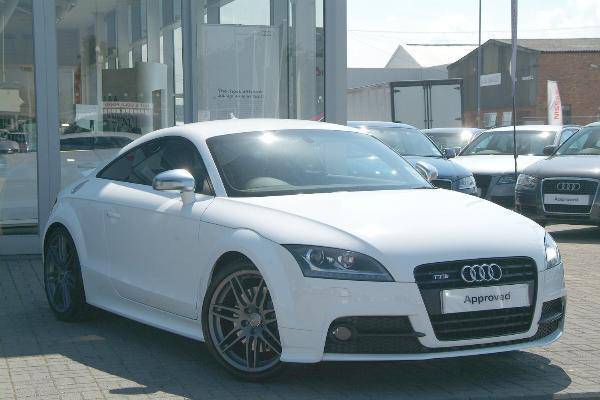

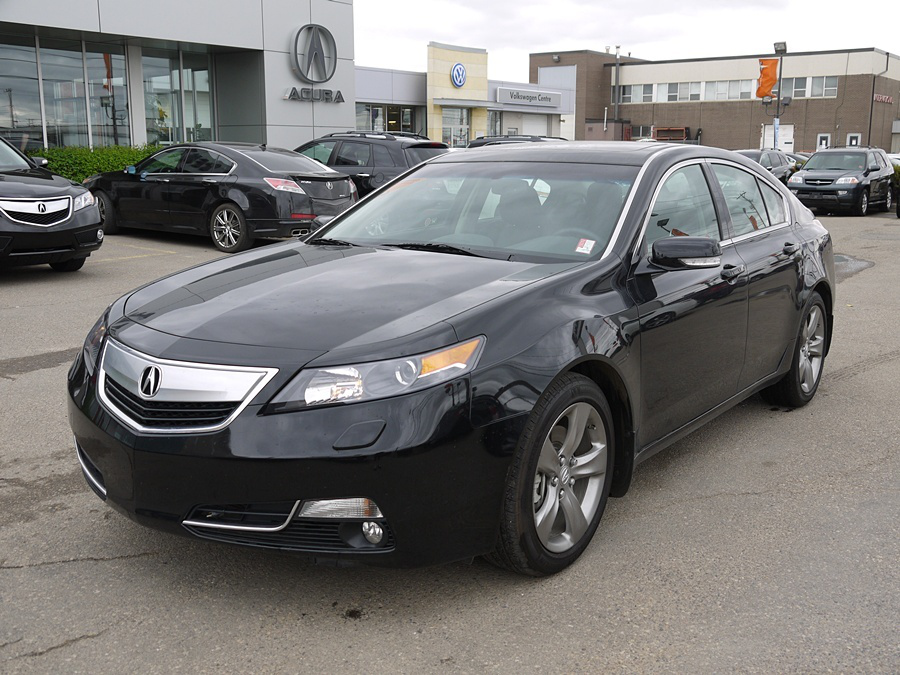

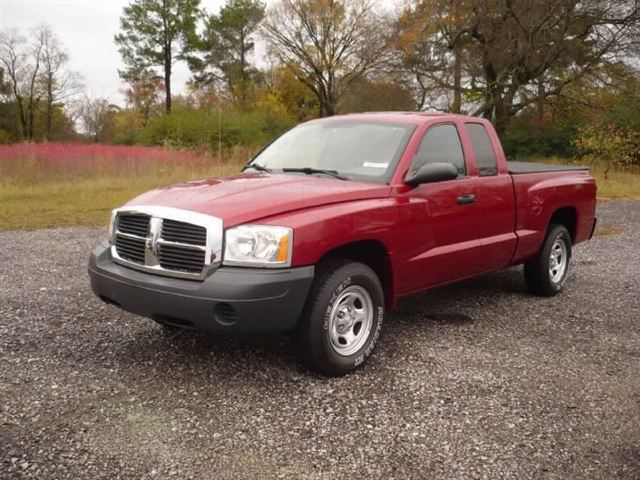

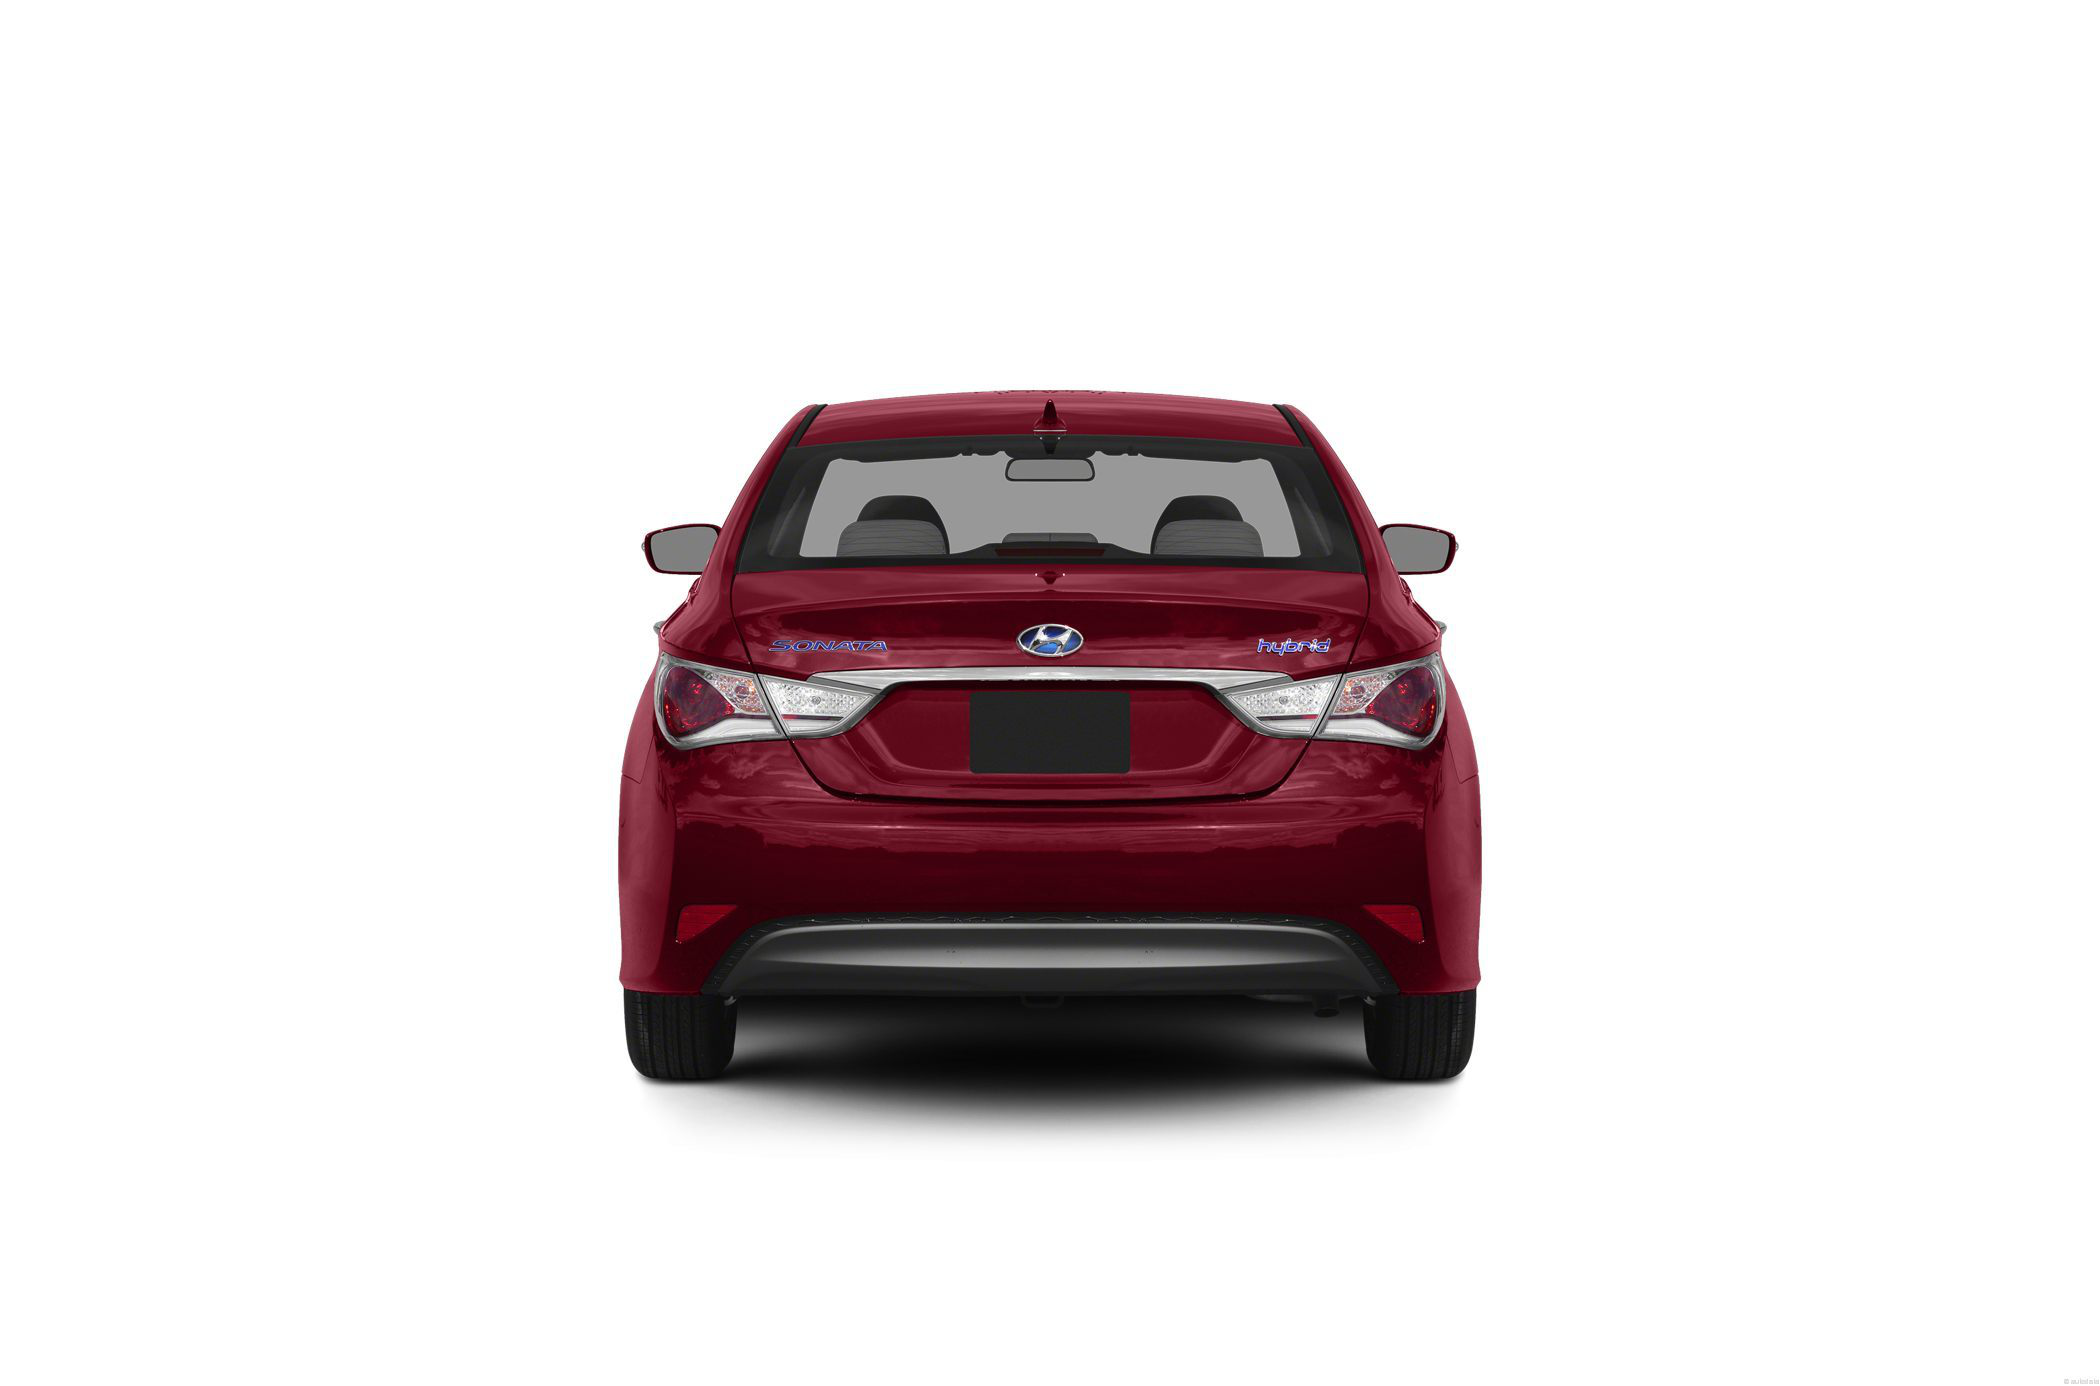

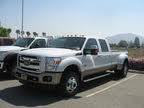

In [80]:
for i in range (5):
    p2img = path / 'cars_train' / df_train.name.iloc[i]
    img = Image.open(p2img)
    display(img)

**Option one**: resize with padding:

In [215]:
item_tfms = [Resize(size=512, method=ResizeMethod.Pad, pad_mode=PadMode.Zeros)]
dls = ImageDataLoaders.from_df(df_train, path, folder='cars_train', valid_pct=0.2 ,valid_col=None, item_tfms=item_tfms)

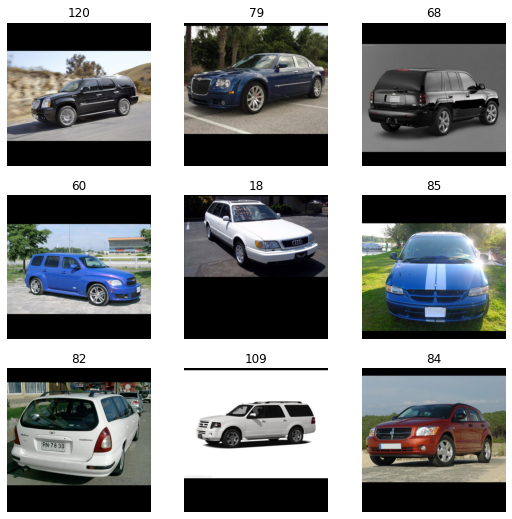

In [216]:
dls.show_batch()

**Option 2**: Resize with crop

In [217]:
item_tfms = [Resize(size=512, method=ResizeMethod.Crop, pad_mode=PadMode.Zeros)]
dls = ImageDataLoaders.from_df(df_train, path, folder='cars_train', valid_pct=0.2, valid_col=None, item_tfms=item_tfms)

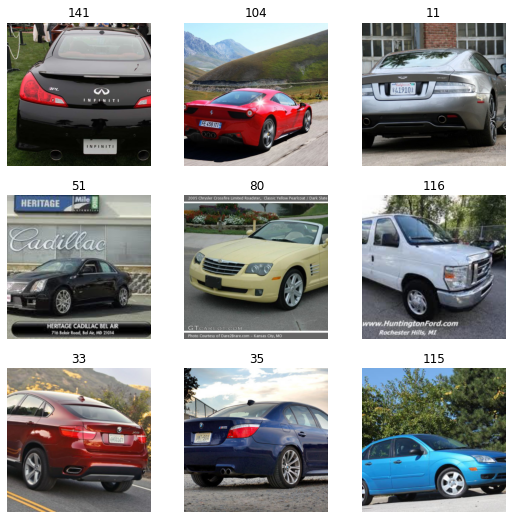

In [218]:
dls.show_batch()

'Dodge Caliber Wagon 2012'

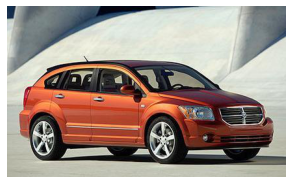

In [219]:
img_nr = 107
show_image(dls.dataset[img_nr][0])
classes[dls.dataset[img_nr][1]]

In [222]:
dls.train_ds

(#6516) [(PILImage mode=RGB size=259x194, TensorCategory(112)),(PILImage mode=RGB size=222x130, TensorCategory(137)),(PILImage mode=RGB size=1100x500, TensorCategory(56)),(PILImage mode=RGB size=500x312, TensorCategory(116)),(PILImage mode=RGB size=259x194, TensorCategory(72)),(PILImage mode=RGB size=800x300, TensorCategory(121)),(PILImage mode=RGB size=480x360, TensorCategory(43)),(PILImage mode=RGB size=1024x768, TensorCategory(49)),(PILImage mode=RGB size=259x194, TensorCategory(173)),(PILImage mode=RGB size=1024x768, TensorCategory(189))...]

In [223]:
dls.valid_ds

(#1628) [(PILImage mode=RGB size=630x473, TensorCategory(113)),(PILImage mode=RGB size=640x480, TensorCategory(181)),(PILImage mode=RGB size=650x366, TensorCategory(19)),(PILImage mode=RGB size=1600x1200, TensorCategory(159)),(PILImage mode=RGB size=267x189, TensorCategory(22)),(PILImage mode=RGB size=429x262, TensorCategory(72)),(PILImage mode=RGB size=640x500, TensorCategory(181)),(PILImage mode=RGB size=400x253, TensorCategory(114)),(PILImage mode=RGB size=300x183, TensorCategory(2)),(PILImage mode=RGB size=640x480, TensorCategory(190))...]

## Creating and fitting a simple learner

In [228]:
learn = cnn_learner(dls, arch=resnet18, metric=[accuracy])

In [229]:
learn.fine_tune(epochs=1)

SuggestedLRs(lr_min=1.9054607491852948e-07, lr_steep=1.3182567499825382e-06)

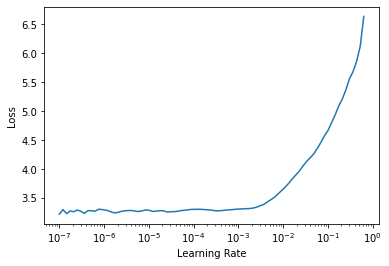

In [230]:
learn.lr_find()

In [234]:
learn.fit_one_cycle(n_epoch=5, lr_max=1e-5)

In [235]:
interp = ClassificationInterpretation.from_learner(learn)

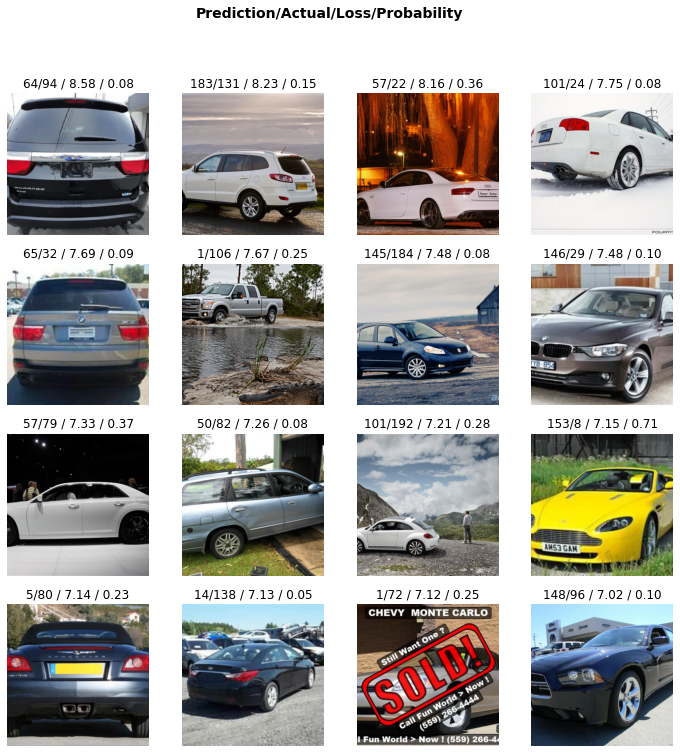

In [241]:
interp.plot_top_losses(k=16)

In [249]:
cm = interp.confusion_matrix()
cm

array([[8, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 7, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 4]])

In [260]:
for i in range(cm.shape[0]):
    # print(i, np.argmax(cm[i,:]))
    print(f"{classes[i][:30]:35s} vs.   {classes[np.argmax(cm[i,:][:30])]}" )

AM General Hummer SUV 2000          vs.   AM General Hummer SUV 2000
Acura RL Sedan 2012                 vs.   BMW ActiveHybrid 5 Sedan 2012
Acura TL Sedan 2012                 vs.   Acura TL Sedan 2012
Acura TL Type-S 2008                vs.   BMW ActiveHybrid 5 Sedan 2012
Acura TSX Sedan 2012                vs.   Acura TSX Sedan 2012
Acura Integra Type R 2001           vs.   Acura Integra Type R 2001
Acura ZDX Hatchback 2012            vs.   Acura ZDX Hatchback 2012
Aston Martin V8 Vantage Conver      vs.   Aston Martin V8 Vantage Convertible 2012
Aston Martin V8 Vantage Coupe       vs.   Aston Martin V8 Vantage Convertible 2012
Aston Martin Virage Convertibl      vs.   Aston Martin V8 Vantage Convertible 2012
Aston Martin Virage Coupe 2012      vs.   Aston Martin Virage Coupe 2012
Audi RS 4 Convertible 2008          vs.   Acura Integra Type R 2001
Audi A5 Coupe 2012                  vs.   Audi S6 Sedan 2011
Audi TTS Coupe 2012                 vs.   Audi A5 Coupe 2012
Audi R8 Coupe 2